In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
data=pd.read_csv("traffic.csv")
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,00:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,00:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,00:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,00:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,00:00:31,Showers,slightly congested


In [219]:
data.describe()

,Fastest_Route_Distance,Fastest_Route_Time
count,16388.000000,16388.000000
mean,1608.768611,150.915304
std,853.399148,80.324398
min,1000.000000,60.000000
25%,1000.000000,120.000000
50%,1200.000000,120.000000
75%,2100.000000,180.000000
max,3900.000000,480.000000


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    16388 non-null  object
 1   Day                     16388 non-null  object
 2   Destination_Location    16388 non-null  object
 3   Fastest_Route_Distance  16388 non-null  int64 
 4   Fastest_Route_Name      16388 non-null  object
 5   Fastest_Route_Time      16388 non-null  int64 
 6   Holiday                 16388 non-null  object
 7   Special_Condition       16388 non-null  object
 8   Starting_Location       16388 non-null  object
 9   Sys_Time                16388 non-null  object
 10  Weather                 16388 non-null  object
 11  Data_prediction         16388 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


In [221]:
data.columns

Index(['Date', 'Day', 'Destination_Location', 'Fastest_Route_Distance',
       'Fastest_Route_Name', 'Fastest_Route_Time', 'Holiday',
       'Special_Condition', 'Starting_Location', 'Sys_Time', 'Weather',
       'Data_prediction'],
      dtype='object')

In [222]:
data.shape

(16388, 12)

<AxesSubplot:xlabel='Data_prediction', ylabel='count'>

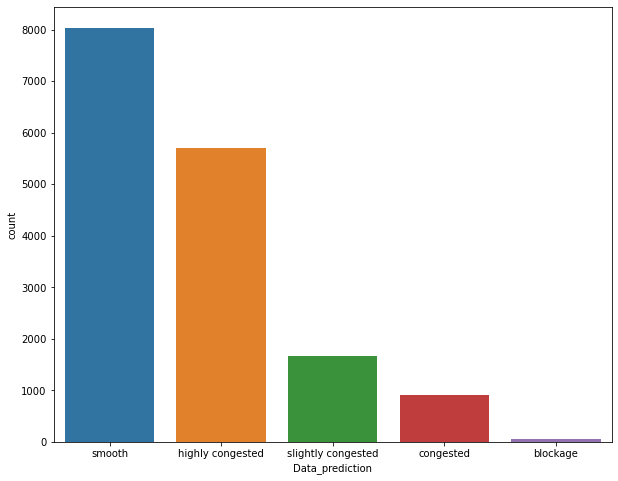

In [223]:
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(data=data,x="Data_prediction")


<AxesSubplot:>

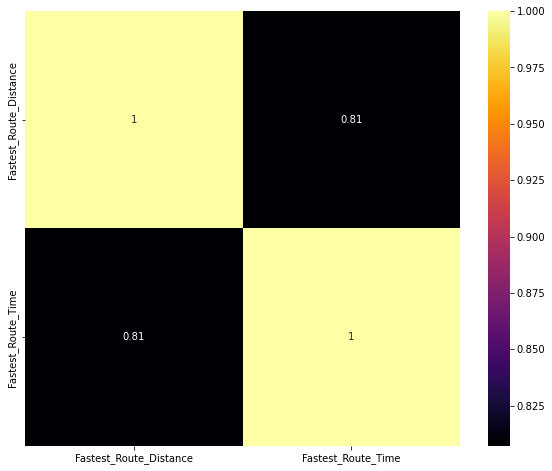

In [224]:
corrmat=data.corr()
sns.heatmap(corrmat,annot=True,cmap="inferno",square=True)

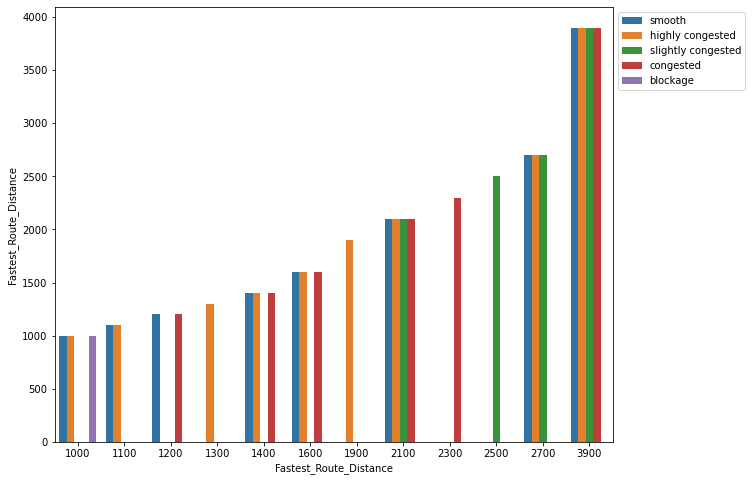

In [225]:
vplt1=sns.barplot(data=data,x="Fastest_Route_Distance",y="Fastest_Route_Distance",hue="Data_prediction")
vplt1.legend(bbox_to_anchor=(1,1),loc="upper left")

<AxesSubplot:xlabel='Fastest_Route_Distance', ylabel='Count'>

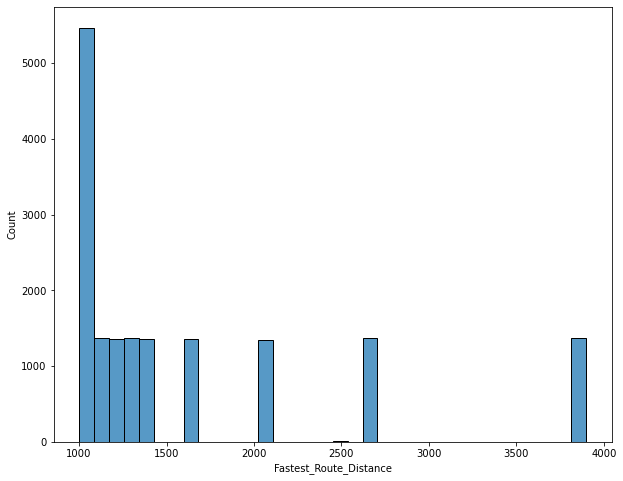

In [226]:
sns.histplot(data=data,x="Fastest_Route_Distance")

In [227]:
data.isnull().sum()

Date                      0
Day                       0
Destination_Location      0
Fastest_Route_Distance    0
Fastest_Route_Name        0
Fastest_Route_Time        0
Holiday                   0
Special_Condition         0
Starting_Location         0
Sys_Time                  0
Weather                   0
Data_prediction           0
dtype: int64

In [228]:
data["Day"].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [229]:
data["Day"].replace(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
                          'Wednesday'],[0,1,2,3,4,5,6,],inplace=True)

In [230]:
data["Destination_Location"].unique()

array(['9th_avenue', 'centaurus', 'crown_plaza', 'roshan_plaza',
       'salt_and_pepper', 'bar_bq_tonight', 'D_chowk', 'childrens_park',
       'pak_turk_maarif_international_school', 'jamia_masjid',
       'missile_chowk', 'capital_gymkhana'], dtype=object)

In [231]:
data["Destination_Location"].replace(['9th_avenue', 'centaurus', 'crown_plaza', 'roshan_plaza',
       'salt_and_pepper', 'bar_bq_tonight', 'D_chowk', 'childrens_park',
       'pak_turk_maarif_international_school', 'jamia_masjid',
       'missile_chowk', 'capital_gymkhana'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [232]:
data["Fastest_Route_Name"].unique()

array(['Jinnah Avenue', 'Jinnah Avenue and Faisal Avenue Flyover',
       'Jinnah Ave', 'A.K. Fazl-ul-Haq Rd and Jinnah Ave',
       'Nazim-ud-din Rd', 'Nazim-ud-din Rd and Jinnah Ave',
       'A.K. Fazl-ul-Haq Rd'], dtype=object)

In [233]:
data["Fastest_Route_Name"].replace(['Jinnah Avenue', 'Jinnah Avenue and Faisal Avenue Flyover',
       'Jinnah Ave', 'A.K. Fazl-ul-Haq Rd and Jinnah Ave',
       'Nazim-ud-din Rd', 'Nazim-ud-din Rd and Jinnah Ave',
       'A.K. Fazl-ul-Haq Rd'],[0,1,2,3,4,5,6],inplace=True)

In [234]:
data["Starting_Location"].unique()

array(['capital_gymkhana', '9th_avenue', 'centaurus', 'crown_plaza',
       'roshan_plaza', 'salt_and_pepper', 'bar_bq_tonight',
       'bahria_foundation_school', 'childrens_park',
       'pak_turk_maarif_international_school', 'jamia_masjid',
       'missile_chowk'], dtype=object)

In [235]:
data["Starting_Location"].replace(['capital_gymkhana', '9th_avenue', 'centaurus', 'crown_plaza',
       'roshan_plaza', 'salt_and_pepper', 'bar_bq_tonight',
       'bahria_foundation_school', 'childrens_park',
       'pak_turk_maarif_international_school', 'jamia_masjid',
       'missile_chowk'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [236]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,0,0,1000,0,60,no,no,0,00:00:01,Showers,smooth
1,13/02/2020,0,1,1300,0,120,no,no,1,00:00:09,Showers,highly congested
2,13/02/2020,0,2,1000,1,60,no,no,2,00:00:17,Showers,smooth
3,13/02/2020,0,3,2700,2,180,no,no,3,00:00:24,Showers,smooth
4,13/02/2020,0,4,3900,2,300,no,no,4,00:00:31,Showers,slightly congested


In [237]:
data=data.drop(["Holiday","Special_Condition","Sys_Time"],1)

In [238]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Starting_Location,Weather,Data_prediction
0,13/02/2020,0,0,1000,0,60,0,Showers,smooth
1,13/02/2020,0,1,1300,0,120,1,Showers,highly congested
2,13/02/2020,0,2,1000,1,60,2,Showers,smooth
3,13/02/2020,0,3,2700,2,180,3,Showers,smooth
4,13/02/2020,0,4,3900,2,300,4,Showers,slightly congested


In [239]:
data["Weather"].unique()

array(['Showers', 'Cloudy', 'Mostly Cloudy', 'Sunny', 'Mostly Sunny',
       'Clear', 'Partly Cloudy', 'Mostly Clear', 'Rain'], dtype=object)

In [240]:
data["Weather"].replace(['Showers', 'Cloudy', 'Mostly Cloudy', 'Sunny', 'Mostly Sunny',
       'Clear', 'Partly Cloudy', 'Mostly Clear', 'Rain'],[0,1,2,3,4,5,6,7,8],inplace=True)

In [241]:
data["Data_prediction"].unique()

array(['smooth', 'highly congested', 'slightly congested', 'congested',
       'blockage'], dtype=object)

In [242]:
data["Data_prediction"].replace(['smooth', 'highly congested', 'slightly congested', 'congested',
       'blockage'],[0,1,2,3,4],inplace=True)

In [243]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Starting_Location,Weather,Data_prediction
0,13/02/2020,0,0,1000,0,60,0,0,0
1,13/02/2020,0,1,1300,0,120,1,0,1
2,13/02/2020,0,2,1000,1,60,2,0,0
3,13/02/2020,0,3,2700,2,180,3,0,0
4,13/02/2020,0,4,3900,2,300,4,0,2


<AxesSubplot:>

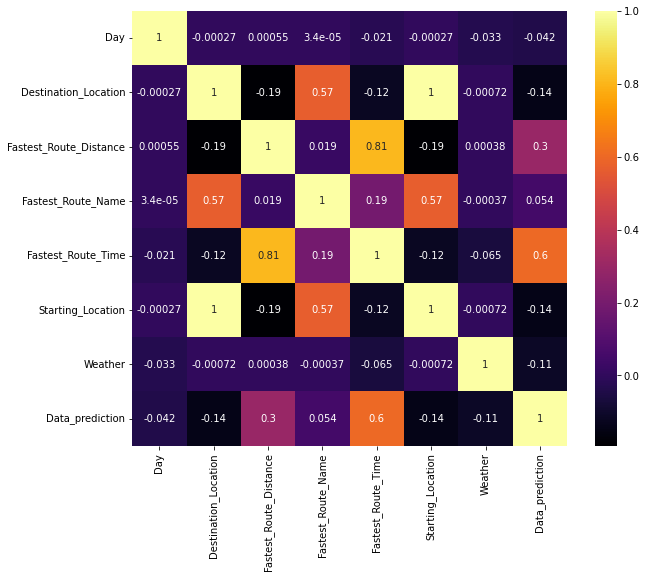

In [244]:
corrmat=data.corr()
sns.heatmap(corrmat,annot=True,square=True,cmap="inferno")

In [245]:
data=data.drop(["Date","Day"],1)

In [246]:
from sklearn.linear_model import LogisticRegression
X=data.drop("Data_prediction",1)
y=data[["Data_prediction"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [247]:
data.sample()

,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Starting_Location,Weather,Data_prediction
4923,9,1400,4,120,9,5,0


In [248]:
model=LogisticRegression(random_state=1,max_iter=100000,solver="lbfgs")
model.fit(X_train,y_train.values.ravel())
LogisticRegression(random_state=1,max_iter=100000)
X_new=np.array([[8,1000,4,180,8,1]])
pred_traf=model.predict(X_new)
if pred_traf==0:
    pred_traf="traffic is smooth"
elif pred_traf==1:
    pred_traf="traffic is highly congested"
elif pred_traf==2:
    pred_traf="traffic is slightly congested"
elif pred_traf==3:
    pred_traf="traffic is congested"
elif pred_traf==4:
    pred_traf="traffic is blockage"  
print(pred_traf)

traffic is highly congested
